In [1]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

from   astropy.table import Table

In [2]:
def grab_ddplimit(fpath):
    dat = fits.open(fpath)

    result = {}
    
    for key in ['RLIM', 'GMR_0P0', 'GMR_0P1', 'ALL']:
        result[key] = dat[1].header[key]
        
    result['DATA'] = Table(dat[1].data)
    result['COUNT'] = fpath.split('_')[-1].replace('.fits', '')
    
    return result

In [3]:
! pwd

/global/u2/m/mjwilson/desi/BGS/Sam/DESI/docs/nb


In [4]:
fpaths = glob.glob('/global/cscratch1/sd/mjwilson/norberg/GAMA4/ddrp_limits/*.fits')

In [5]:
ddp_limits = [grab_ddplimit(x) for x in fpaths]

In [6]:
gama_kE = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_kE.fits')
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,mag,,,,,,,,mag,mag,,,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64
386805,587727944563819000,134.01009244,2.32209878,18.999538,0.19489,4,G09_Y2_021_192,6,21.098183,19.805834,19.002657,18.573671,18.334898,671.3846300853444,39.1348569739141,0.8031769,0.6207474460688747,0,4,-0.043401164231396824,0.13902826958254105,0.1745780060255559,0.4107686751775556,0.5669862107308128,2.12,-0.18904331,-0.4131668,-20.120853245043946,-19.896729767108155,39.120391666674806,38.896268188739015
196108,587725073914003977,129.40701904,-0.70191331,19.317492,0.1769,4,G09_Y2_019_103,6,20.896608,19.965784,19.284044,18.873354,18.67871,602.5196376086117,38.899856031056714,0.6817398,0.5468141266713421,0,4,-0.06938452547299719,0.06554115498456703,0.13781159009089128,0.31130577871524984,0.5082456185045476,2.12,-0.17159301,-0.37502798,-19.548583079349967,-19.345148105394813,38.86607461072204,38.66263963676688
3581319,587729150375362743,132.22724598,-1.52302925,17.708998,0.21845,4,G09_Y4_227_197,6,19.991367,18.631165,17.707405,17.242115,16.91901,763.5372292561811,39.4141510882087,0.92375946,0.6722014342809547,0,4,-0.015126542544098703,0.23643148362416533,0.20636152599301677,0.5272372237588918,0.6028837626833436,2.12,-0.2118965,-0.46311396,-21.699618393730333,-21.448400924157312,39.40861612017076,39.15739865059774
3583283,587729150375821538,133.29179777,-1.62363597,19.004656,0.07737,4,G09_Y4_239_058,6,20.095257,19.215954,19.001188,18.822033,18.742218,246.19238260163945,36.95637305684218,0.21476555,0.2327932438664232,0,2,-0.10164614078540275,-0.11967383594552983,0.06312904423149192,0.03171773689897445,0.24617685603857214,2.12,-0.07504891,-0.1640244,-17.939797354469707,-17.85082186533015,36.944453192482406,36.85547770334285
301894,587726032229105915,135.59405392,1.2824009,16.884815,0.13108,5,528210091002849280,6,20.099348,17.841904,16.780191,16.346266,15.997567,433.17604316774094,38.183322149649214,1.0617123,0.9774386323843438,0,6,-0.060613110767923827,0.023660521862380823,0.1706670944326003,0.4173594637694922,0.8150198956777566,0.8,-0.1271476,-0.104864,-21.342026427962622,-21.364310026743254,38.226841644027076,38.24912524280771
418145,587728879258239301,135.12374329,2.57136785,18.704964,0.12964,4,G09_Y1_DX2_383,6,20.994415,19.530191,18.758545,18.315557,18.036816,427.99808211047826,38.157209114567,0.7716465,0.7167258705330736,0,5,-0.07574448305343172,-0.02082385395271634,0.14877992383604488,0.286479601943904,0.63394682152593,0.8,-0.1257508,-0.103712,-19.475274559314265,-19.497313354368224,38.180238243396296,38.202277038450255
569269,588848899392667895,218.52591376,-0.42654574,19.378517,0.22188,4,G15_Y3_033_178,6,21.855558,20.410545,19.39021,18.927923,18.596373,777.1363735519409,39.452486182062515,1.0203362,0.740540917017054,0,5,0.008442750412102878,0.2882379845180956,0.23459122141309607,0.6043656704515488,0.6505617020845942,0.8,-0.21522361,-0.177504,-20.093336642195553,-20.131056249548763,39.47185379307446,39.50957340042767
3860373,588010930295800053,133.37415158,-1.84596148,19.05723,0.1052,4,G09_Y4_219_046,6,21.321253,19.676575,19.031342,18.663939,18.54741,341.4890012716901,37.66688360210919,0.64523315,0.6374839062662768,0,4,-0.09922906229948192,-0.09147981426888362,0.11989144876395252,0.18646198064038305,0.5786626224204445,2.12,-0.102044,-0.22302398,-18.627501053923943,-18.506521074289658,37.68473104965148,37.5637510700172


In [7]:
gama_ddp = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_ddp.fits')
gama_ddp

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN,DDP [3]
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64
386805,587727944563819000,134.01009244,2.32209878,18.999538,0.19489,4,G09_Y2_021_192,6,21.098183,19.805834,19.002657,18.573671,18.334898,671.3846300853444,39.1348569739141,0.8031769,0.6207474460688747,0,4,-0.043401164231396824,0.13902826958254105,0.1745780060255559,0.4107686751775556,0.5669862107308128,2.12,-0.18904331,-0.4131668,-20.120853245043946,-19.896729767108155,39.120391666674806,38.896268188739015,0.8004608,0.28464481687367604,0.0,-6.9995384,0.007955196992671823,0.0,0 .. 0
196108,587725073914003977,129.40701904,-0.70191331,19.317492,0.1769,4,G09_Y2_019_103,6,20.896608,19.965784,19.284044,18.873354,18.67871,602.5196376086117,38.899856031056714,0.6817398,0.5468141266713421,0,4,-0.06938452547299719,0.06554115498456703,0.13781159009089128,0.31130577871524984,0.5082456185045476,2.12,-0.17159301,-0.37502798,-19.548583079349967,-19.345148105394813,38.86607461072204,38.66263963676688,0.4825077,0.22304376921442798,0.0,-7.3174915,0.006176633539799811,0.0,0 .. 0
3581319,587729150375362743,132.22724598,-1.52302925,17.708998,0.21845,4,G09_Y4_227_197,6,19.991367,18.631165,17.707405,17.242115,16.91901,763.5372292561811,39.4141510882087,0.92375946,0.6722014342809547,0,4,-0.015126542544098703,0.23643148362416533,0.20636152599301677,0.5272372237588918,0.6028837626833436,2.12,-0.2118965,-0.46311396,-21.699618393730333,-21.448400924157312,39.40861612017076,39.15739865059774,2.0910015,0.5321657569147775,0.0,-5.7089977,0.01619295108168265,0.0,1 .. 0
3583283,587729150375821538,133.29179777,-1.62363597,19.004656,0.07737,4,G09_Y4_239_058,6,20.095257,19.215954,19.001188,18.822033,18.742218,246.19238260163945,36.95637305684218,0.21476555,0.2327932438664232,0,2,-0.10164614078540275,-0.11967383594552983,0.06312904423149192,0.03171773689897445,0.24617685603857214,2.12,-0.07504891,-0.1640244,-17.939797354469707,-17.85082186533015,36.944453192482406,36.85547770334285,0.7953434,0.11292987662789934,0.0,-7.004656,0.0031081360358404123,0.0,0 .. 1
301894,587726032229105915,135.59405392,1.2824009,16.884815,0.13108,5,528210091002849280,6,20.099348,17.841904,16.780191,16.346266,15.997567,433.17604316774094,38.183322149649214,1.0617123,0.9774386323843438,0,6,-0.060613110767923827,0.023660521862380823,0.1706670944326003,0.4173594637694922,0.8150198956777566,0.8,-0.1271476,-0.104864,-21.342026427962622,-21.364310026743254,38.226841644027076,38.24912524280771,2.915184,0.38860801596886707,0.0,-4.884815,0.015471772499660577,0.0,1 .. 0
418145,587728879258239301,135.12374329,2.57136785,18.704964,0.12964,4,G09_Y1_DX2_383,6,20.994415,19.530191,18.758545,18.315557,18.036816,427.99808211047826,38.157209114567,0.7716465,0.7167258705330736,0,5,-0.07574448305343172,-0.02082385395271634,0.14877992383604488,0.286479601943904,0.63394682152593,0.8,-0.1257508,-0.103712,-19.475274559314265,-19.497313354368224,38.180238243396296,38.202277038450255,1.0950356,0.20426831744798465,0.0,-6.7049637,0.006598485845515141,0.0,0 .. 0
569269,588848899392667895,218.52591376,-0.42654574,19.378517,0.22188,4,G15_Y3_033_178,6,21.855558,20.410545,19.39021,18.927923,18.596373,777.1363735519409,39.452486182062515,1.0203362,0.740540917017054,0,5,0.008442750412102878,0.2882379845180956,0.23459122141309607,0.6043656704515488,0.6505617020845942,0.8,-0.21522361,-0.177504,-20.093336642195553,-20.1310

In [8]:
gama_ddp.meta

OrderedDict([('DDP1_ZMIN', 0.0390699990093708),
             ('DDP1_ZMAX', 0.2483299970626831),
             ('DDP1_VZ', 6451530.309761727),
             ('DDP1_NGAL', 34732),
             ('DDP1_DENS', 0.005383528919866882),
             ('DDP2_ZMIN', 0.03914999961853027),
             ('DDP2_ZMAX', 0.1830800026655197),
             ('DDP2_VZ', 2679079.755786841),
             ('DDP2_NGAL', 26598),
             ('DDP2_DENS', 0.009928035902084674),
             ('DDP3_ZMIN', 0.03903000056743622),
             ('DDP3_ZMAX', 0.09973999857902527),
             ('DDP3_VZ', 432372.2344703941),
             ('DDP3_NGAL', 7954),
             ('DDP3_DENS', 0.01839618589233124)])

							BRIGHT: 7
0	7	12.000	0.131	0.164	False
1	0	12.000	0.131	0.164	True
2	26	19.800	0.933	0.773	False
3	5	12.000	0.933	0.773	True
4	23	19.800	0.443	0.423	False
5	8	12.000	0.298	0.299	False
6	18	19.800	0.785	0.682	True
7	2	12.000	0.443	0.423	True
8	12	12.000	0.933	0.773	False
							FAINT: 27
9	27	19.800	1.067	0.900	False
10	24	19.800	0.603	0.555	False
11	1	12.000	0.298	0.299	True
12	21	19.800	0.131	0.164	False
13	11	12.000	0.785	0.682	False
15	10	12.000	0.603	0.555	False
16	16	19.800	0.443	0.423	True
17	25	19.800	0.785	0.682	False
19	6	12.000	1.067	0.900	True
20	14	19.800	0.131	0.164	True
21	22	19.800	0.298	0.299	False
22	19	19.800	0.933	0.773	True
23	15	19.800	0.298	0.299	True
24	13	12.000	1.067	0.900	False
25	9	12.000	0.443	0.423	False
26	4	12.000	0.785	0.682	True
27	20	19.800	1.067	0.900	True


(-16.5, -22.5)

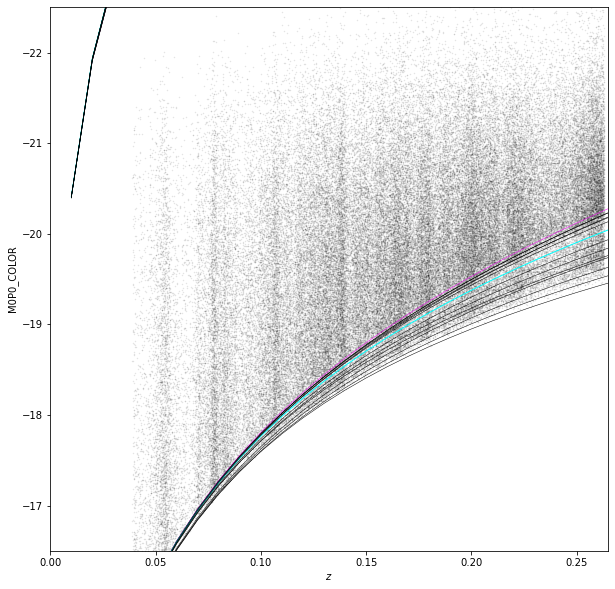

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

for i, ddp_limit in enumerate(ddp_limits):
    data = ddp_limit['DATA']

    cnt  = ddp_limit['COUNT']
    rlim = ddp_limit['RLIM']
    MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]
    
    if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
        ax.plot(data['Z'], data[MCOL], c='cyan', lw=1.)
        continue
    
    if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5)

        print('\t\t\t\t\t\t\tFAINT: {}'.format(cnt))
        
    elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5)

        print('\t\t\t\t\t\t\tBRIGHT: {}'.format(cnt))
        
    else:
        ax.plot(data['Z'], data[MCOL], c='k', lw=0.5)
    
    print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))

plt.scatter(gama_kE['ZGAMA'], gama_kE['MCOLOR_0P0'], s=0.25, alpha=0.1, c='k')
    
ax.set_xlabel(r'$z$')
ax.set_ylabel('M0P0_COLOR')

ax.set_xlim(  0.0, 0.265)
ax.set_ylim(-16.5, -22.5)

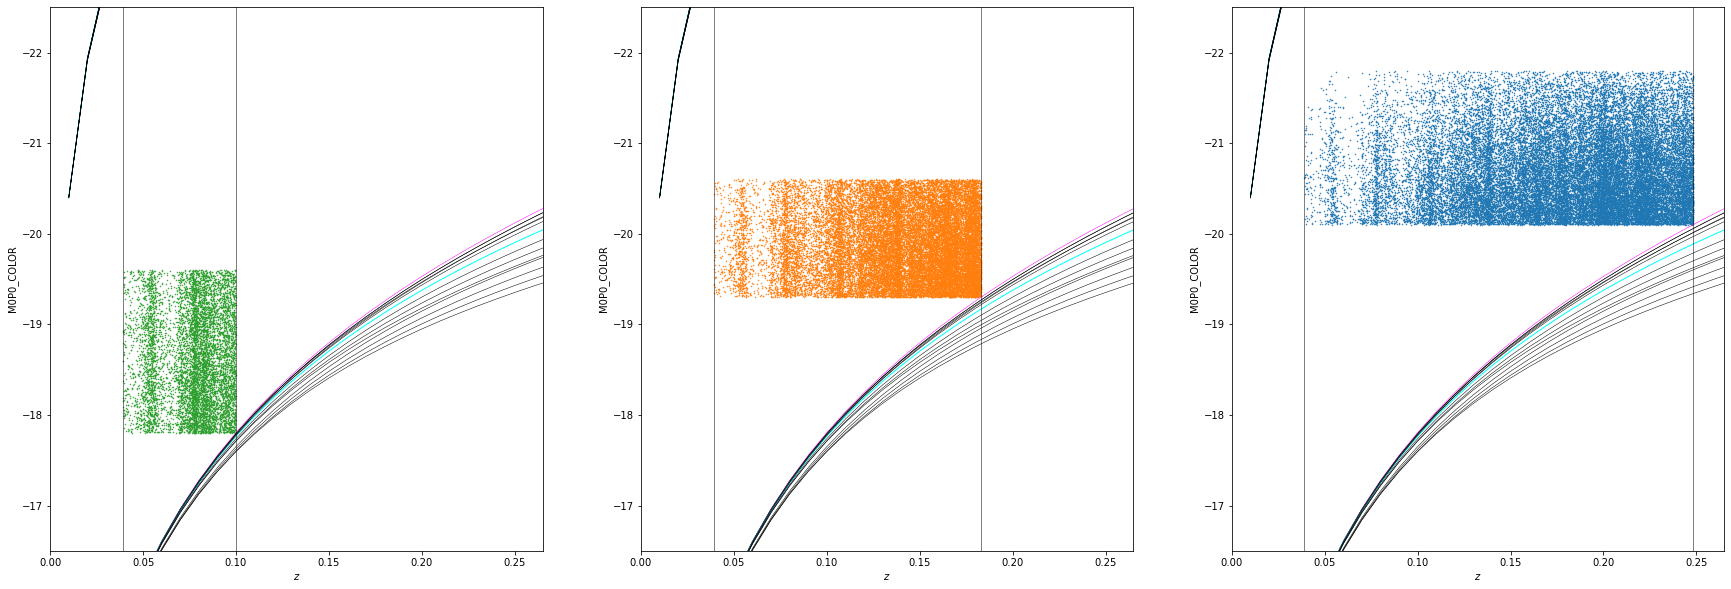

In [10]:
fig, axes = plt.subplots(1,3,figsize=(30,10))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for ax in axes:
    for i, ddp_limit in enumerate(ddp_limits):
        data = ddp_limit['DATA']

        cnt  = ddp_limit['COUNT']
        rlim = ddp_limit['RLIM']
        MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]
    
        if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
            ax.plot(data['Z'], data[MCOL], c='cyan', lw=1.)
            continue
    
        if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5)
        
        elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5)
        
        else:
            ax.plot(data['Z'], data[MCOL], c='k', lw=0.5)
        
        # print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
        ax.set_xlabel(r'$z$')
        ax.set_ylabel('M0P0_COLOR')

        ax.set_xlim(  0.0, 0.265)
        ax.set_ylim(-16.5, -22.5)

for i, ax in enumerate(axes[::-1]):    
    is_ddp = [x == 1 for x in gama_ddp['DDP'].data[:,i]]
    ax.scatter(gama_ddp['ZGAMA'][is_ddp], gama_ddp['MCOLOR_0P0'][is_ddp], s=0.25, alpha=1., c=colors[i])
    
# TODO: Get from header.
zlims = {'DDP1_ZMIN': 0.039069999009370804,\
         'DDP1_ZMAX': 0.2483299970626831,\
         'DDP1_VZ': 6451530.309761727,\
         'DDP1_DENS': 0.005383528919866882,\
         'DDP2_ZMIN': 0.03914999961853027,\
         'DDP2_ZMAX': 0.18308000266551971,\
         'DDP2_VZ': 2679079.7557868413,\
         'DDP2_DENS': 0.009928035902084674,\
         'DDP3_ZMIN': 0.03903000056743622,\
         'DDP3_ZMAX': 0.09973999857902527,\
         'DDP3_VZ': 432372.2344703941,\
         'DDP3_DENS': 0.018396185892331243}

for idx, ax in zip(range(3), axes[::-1]):
    zmin = zlims['DDP{}_ZMIN'.format(idx+1)]
    zmax = zlims['DDP{}_ZMAX'.format(idx+1)]
    
    ax.axvline(zmin, lw=0.5, c='k')
    ax.axvline(zmax, lw=0.5, c='k')

# Done.